In [3]:
from functions import bilinear_interpolation, bicubic_interpolation, generate_random_terrain_gradient, generate_fractal_terrain
from utils import visualize_3d_terrain, visualize_terrain
import numpy as np

In [2]:
size = 1024 
lattice_size = 256 
random_seed = 43


In [6]:
bl_terrain = np.zeros((size, size)) # for bilinear
bc_terrain = np.zeros((size, size)) # for bicubic

In [10]:
n_lattice_points = size // lattice_size + 1
np.random.seed(random_seed)
gradients = np.random.rand(n_lattice_points, n_lattice_points, 2) * 3 - 1.5
gradients.min(), gradients.max(), gradients.mean(), gradients.shape


(-1.4846113528066291, 1.4807174771823104, 0.052959961373983504, (5, 5, 2))

In [12]:
# Calculate heights from gradients
for i in range(n_lattice_points-1):
    for j in range(n_lattice_points-1):
        i0 = i * lattice_size
        i1 = (i + 1) * lattice_size
        j0 = j * lattice_size
        j1 = (j + 1) * lattice_size
        
        g00 = gradients[i, j]
        g10 = gradients[i + 1, j] #if i + 1 < coarse_size else coarse_terrain[0, j]
        g01 = gradients[i, j + 1] #if j + 1 < coarse_size else coarse_terrain[i, 0]
        g11 = gradients[i + 1, j + 1] #if i + 1 < coarse_size and j + 1 < coarse_size else coarse_terrain[0, 0]
        
        for x in range(i0, i1):
            for y in range(j0, j1):
                x_ratio = (x - i0) / lattice_size
                y_ratio = (y - j0) / lattice_size
                
                h00 = np.dot(g00, [x_ratio, y_ratio])
                h10 = np.dot(g10, [x_ratio - 1, y_ratio])
                h01 = np.dot(g01, [x_ratio, y_ratio - 1])
                h11 = np.dot(g11, [x_ratio - 1, y_ratio - 1])
                
                bl_terrain[x, y] = bilinear_interpolation(x_ratio, y_ratio, h00, h10, h01, h11)
                bc_terrain[x, y] = bicubic_interpolation(x_ratio, y_ratio, h00, h10, h01, h11)
    


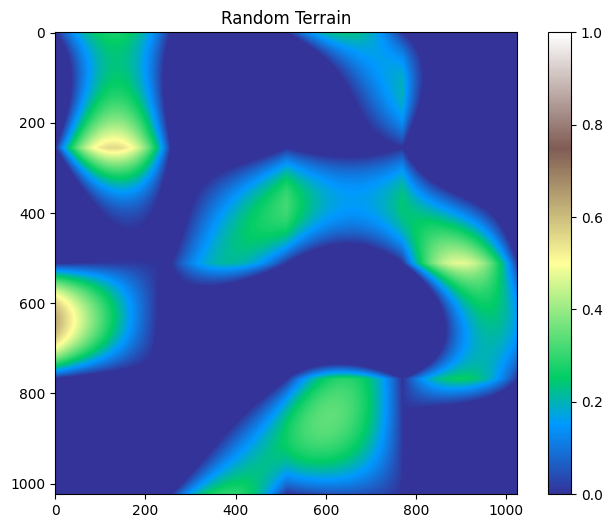

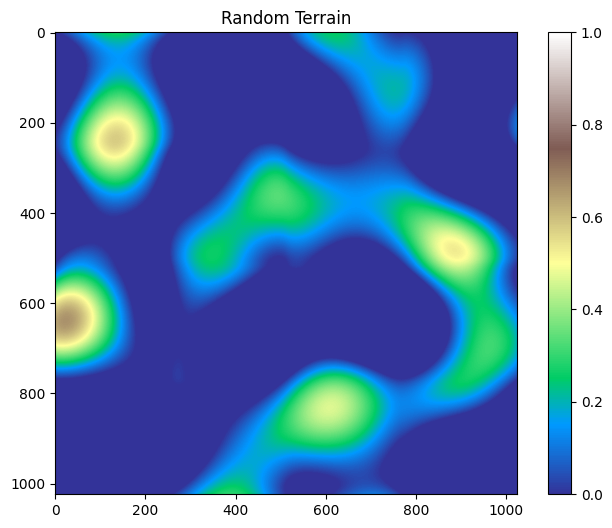

In [15]:

visualize_terrain(bl_terrain)
visualize_terrain(bc_terrain)


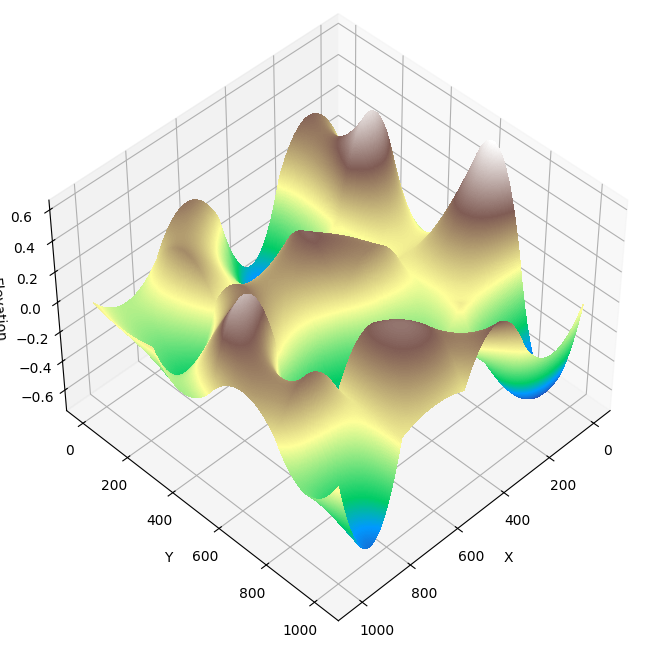

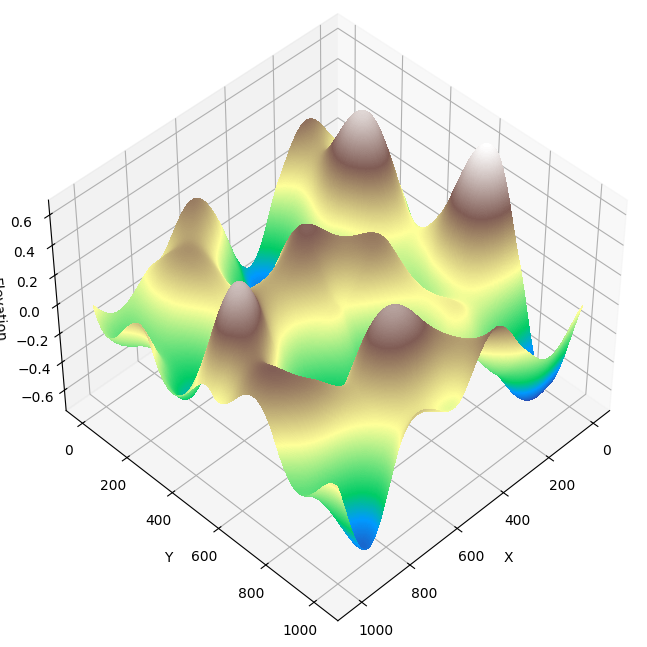

In [16]:

visualize_3d_terrain(bl_terrain, cmap='terrain', elev=45, azim=45)
visualize_3d_terrain(bc_terrain, cmap='terrain', elev=45, azim=45)

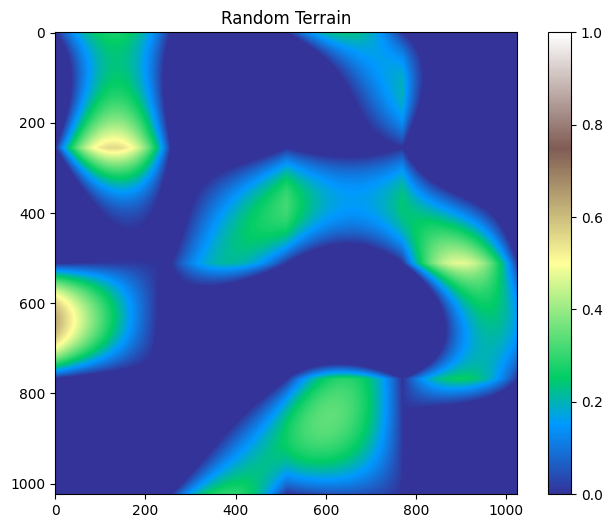

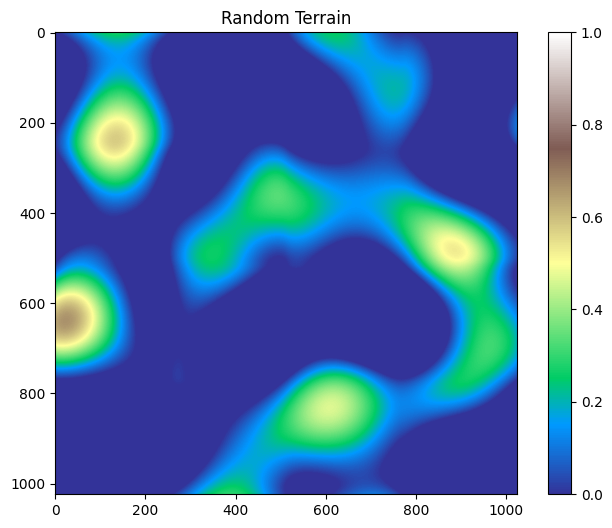

In [3]:
bl_terrain2, bc_terrain2 = generate_random_terrain_gradient(size, lattice_size, random_seed)
visualize_terrain(bl_terrain2)
visualize_terrain(bc_terrain2)


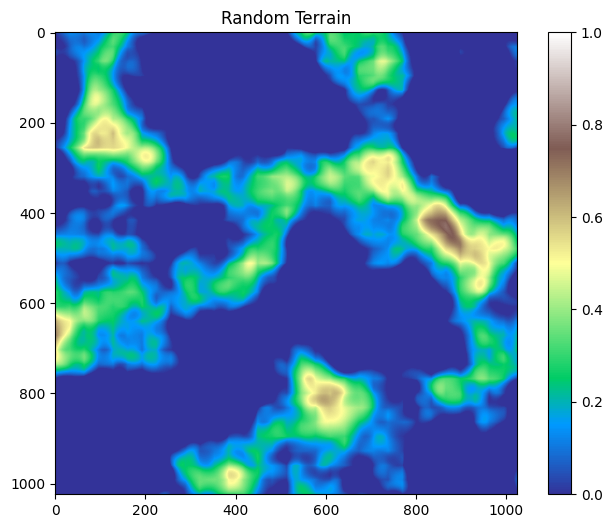

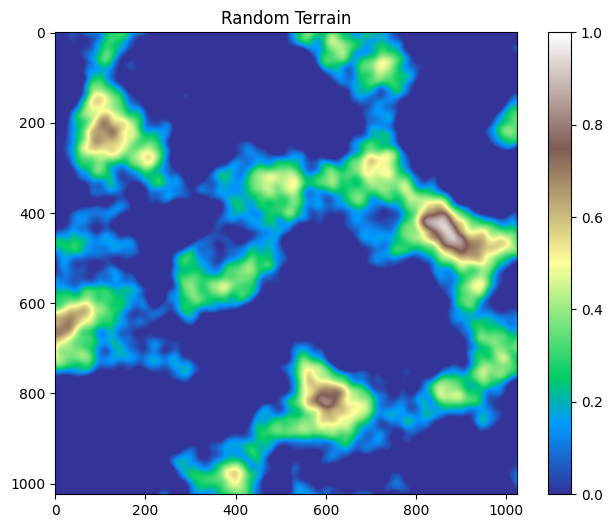

In [4]:
terrain_bl, terrain_bc = generate_fractal_terrain(size, lattice_size, generate_random_terrain_gradient, 1, 4, 43)
visualize_terrain(terrain_bl)
visualize_terrain(terrain_bc)

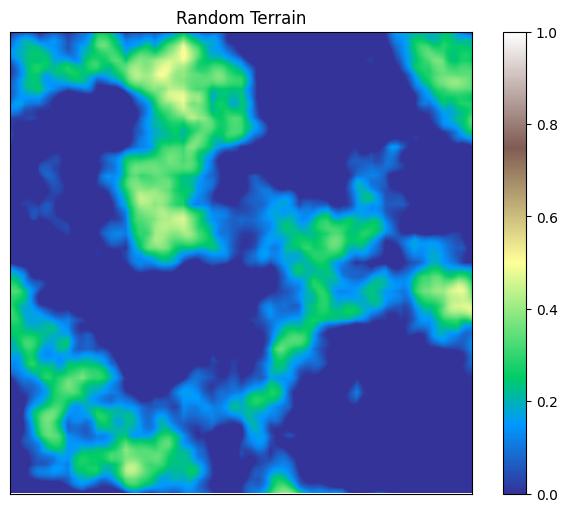

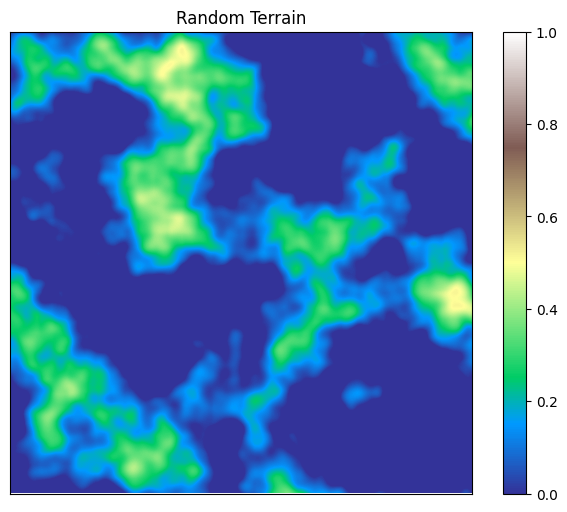

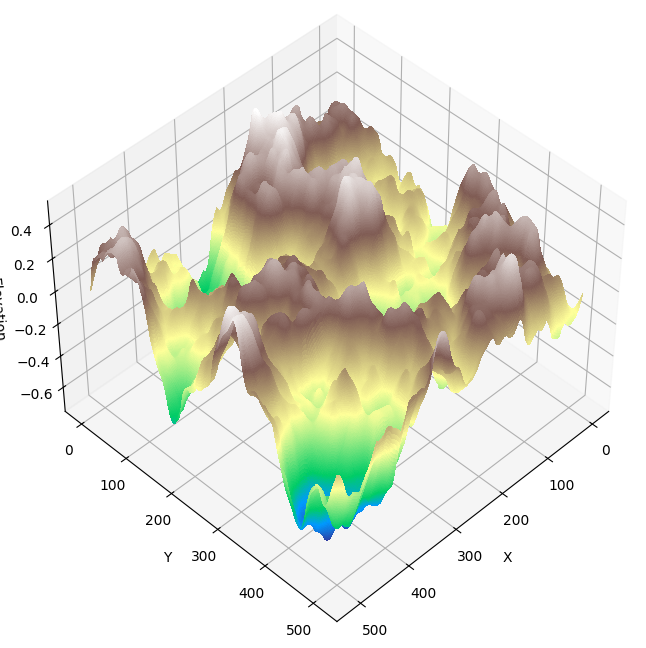

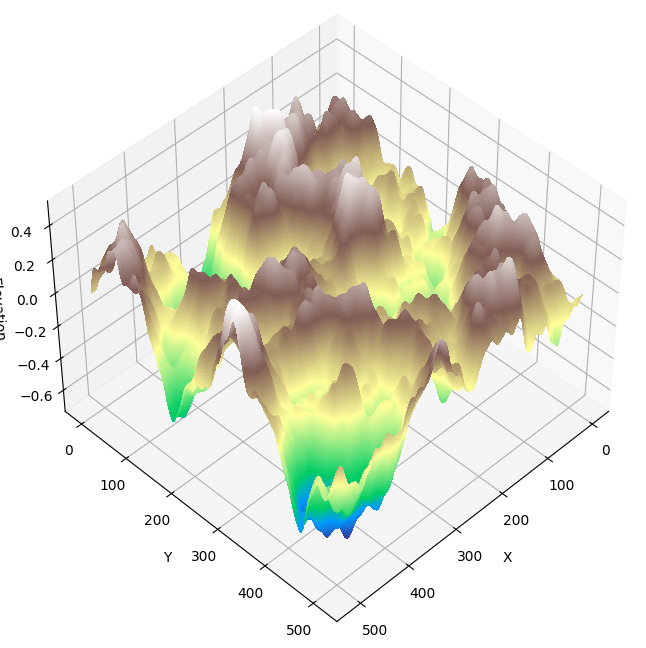

In [35]:
visualize_3d_terrain(terrain_bl, cmap='terrain', elev=45, azim=45)
visualize_3d_terrain(terrain_bc, cmap='terrain', elev=45, azim=45)